# ----------------------------------MISSING DATA----------------------------------------

### Imports

In [36]:
import pandas as pd
import numpy as np
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, neighbors

### Reading each CSV in a separate dataframe

In [3]:
d1 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3a_securev1.csv', header=1, skipfooter=4, engine='python')
d2 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3b_securev1.csv', header=1, skipfooter=4, engine='python')
d3 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3c_securev1.csv', header=1, skipfooter=4, engine='python')
d4 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3d_securev1.csv', header=1, skipfooter=4, engine='python')
d5 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q1.csv', header=1, skipfooter=4, engine='python')
d6 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q2.csv', header=1, skipfooter=4, engine='python')
d7 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q3.csv', header=1, skipfooter=4, engine='python')
d8 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q4.csv', header=1, skipfooter=4, engine='python')
d9 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q1.csv', header=1, skipfooter=4, engine='python')
d10 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q2.csv', header=1, skipfooter=4, engine='python')
d11 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q3.csv', header=1, skipfooter=4, engine='python')

### Concatenating all the CSVs in one dataframe

In [4]:
loan_data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10])

In [6]:
loan_data.shape

(1524072, 151)

### Finding the missing data percentage and storing columns in features with mores than 70% data

In [10]:
missing_data = loan_data.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/loan_data.shape[0])*100
missing_data.head()
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]
print('Number of columns after removing missing columns -',len(features))

Number of columns after removing missing columns - 93


### Excluding columns leaking information to the future

## ------------------------------Cleaning the data as per requirement----------------------------------

In [52]:
del loan_data['id']
s = loan_data.reset_index()
s['index'] = s.index +1
s=s.rename(columns = {'index':'id'})

### Considering on the imp features

In [53]:
f = ['id','application_type','fico_range_low','fico_range_high','emp_length','dti','annual_inc','dti_joint','annual_inc_joint','grade','sub_grade','int_rate','loan_amnt','issue_d','purpose','addr_state','zip_code']

In [81]:
# df is the main dataframe required for working
df = s[f]

In [82]:
df.head()

,id,application_type,fico_range_low,fico_range_high,emp_length,dti,annual_inc,dti_joint,annual_inc_joint,grade,sub_grade,int_rate,loan_amnt,issue_d,purpose,addr_state,zip_code
0,1,Individual,735.0,739.0,10+ years,27.65,24000.0,NaN,NaN,B,B2,10.65%,5000.0,Dec-2011,credit_card,AZ,860xx
1,2,Individual,740.0,744.0,< 1 year,1.00,30000.0,NaN,NaN,C,C4,15.27%,2500.0,Dec-2011,car,GA,309xx
2,3,Individual,735.0,739.0,10+ years,8.72,12252.0,NaN,NaN,C,C5,15.96%,2400.0,Dec-2011,small_business,IL,606xx
3,4,Individual,690.0,694.0,10+ years,20.00,49200.0,NaN,NaN,C,C1,13.49%,10000.0,Dec-2011,other,CA,917xx
4,5,Individual,695.0,699.0,1 year,17.94,80000.0,NaN,NaN,B,B5,12.69%,3000.0,Dec-2011,other,OR,972xx


In [83]:
df.isnull().sum()

id                        0
application_type          1
fico_range_low            1
fico_range_high           1
emp_length                1
dti                     174
annual_inc                5
dti_joint           1503556
annual_inc_joint    1503552
grade                     1
sub_grade                 1
int_rate                  1
loan_amnt                 1
issue_d                   1
purpose                   1
addr_state                1
zip_code                  2
dtype: int64

In [84]:
df = df[df.application_type.notnull()]

### Emp Length

In [85]:
df['emp_length']=np.where(df['emp_length']=='10+ years','10',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='< 1 year','0',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='1 year','1',df['emp_length'])
df['emp_length'] = df['emp_length'].map(lambda x: x.rstrip('years').strip())

### Zipcode

In [60]:
df['zip_code'] = df['zip_code'].astype(str).map(lambda x: x.rstrip('xx'))

### Int Rate

In [61]:
df['int_rate'] = df['int_rate'].astype(str).map(lambda x: x.rstrip('%'))
df['int_rate'] = df['int_rate'].astype(float)

### Date

In [62]:
df['Year'] = df['issue_d'].astype(str).map(lambda x: int(x.split('-')[1]))
df['Month'] = df['issue_d'].astype(str).map(lambda x: x.split('-')[0])

###  annual_inc_joint and dti_joint

In [63]:
df['dti_joint'] = np.where(df['application_type']=='Individual',0,df['dti_joint'])

In [65]:
df['annual_inc_joint'] = np.where(df['application_type']=='Individual',0,df['annual_inc_joint'])

In [67]:
df[df.annual_inc.isnull()]

,id,application_type,fico_range_low,fico_range_high,emp_length,dti,annual_inc,dti_joint,annual_inc_joint,grade,sub_grade,int_rate,loan_amnt,issue_d,purpose,addr_state,zip_code,Year,Month
42450,42451,Individual,800.0,804.0,0,1.0,NaN,0.0,0.0,A,A2,7.43,5000.0,Aug-2007,other,NY,100,2007,Aug
42451,42452,Individual,800.0,804.0,0,1.0,NaN,0.0,0.0,A,A3,7.75,7000.0,Aug-2007,other,NY,100,2007,Aug
42481,42482,Individual,800.0,804.0,0,1.0,NaN,0.0,0.0,A,A3,7.75,6700.0,Jul-2007,other,NY,100,2007,Jul
42534,42535,Individual,740.0,744.0,0,4.0,NaN,0.0,0.0,A,A5,8.38,6500.0,Jun-2007,other,NY,100,2007,Jun


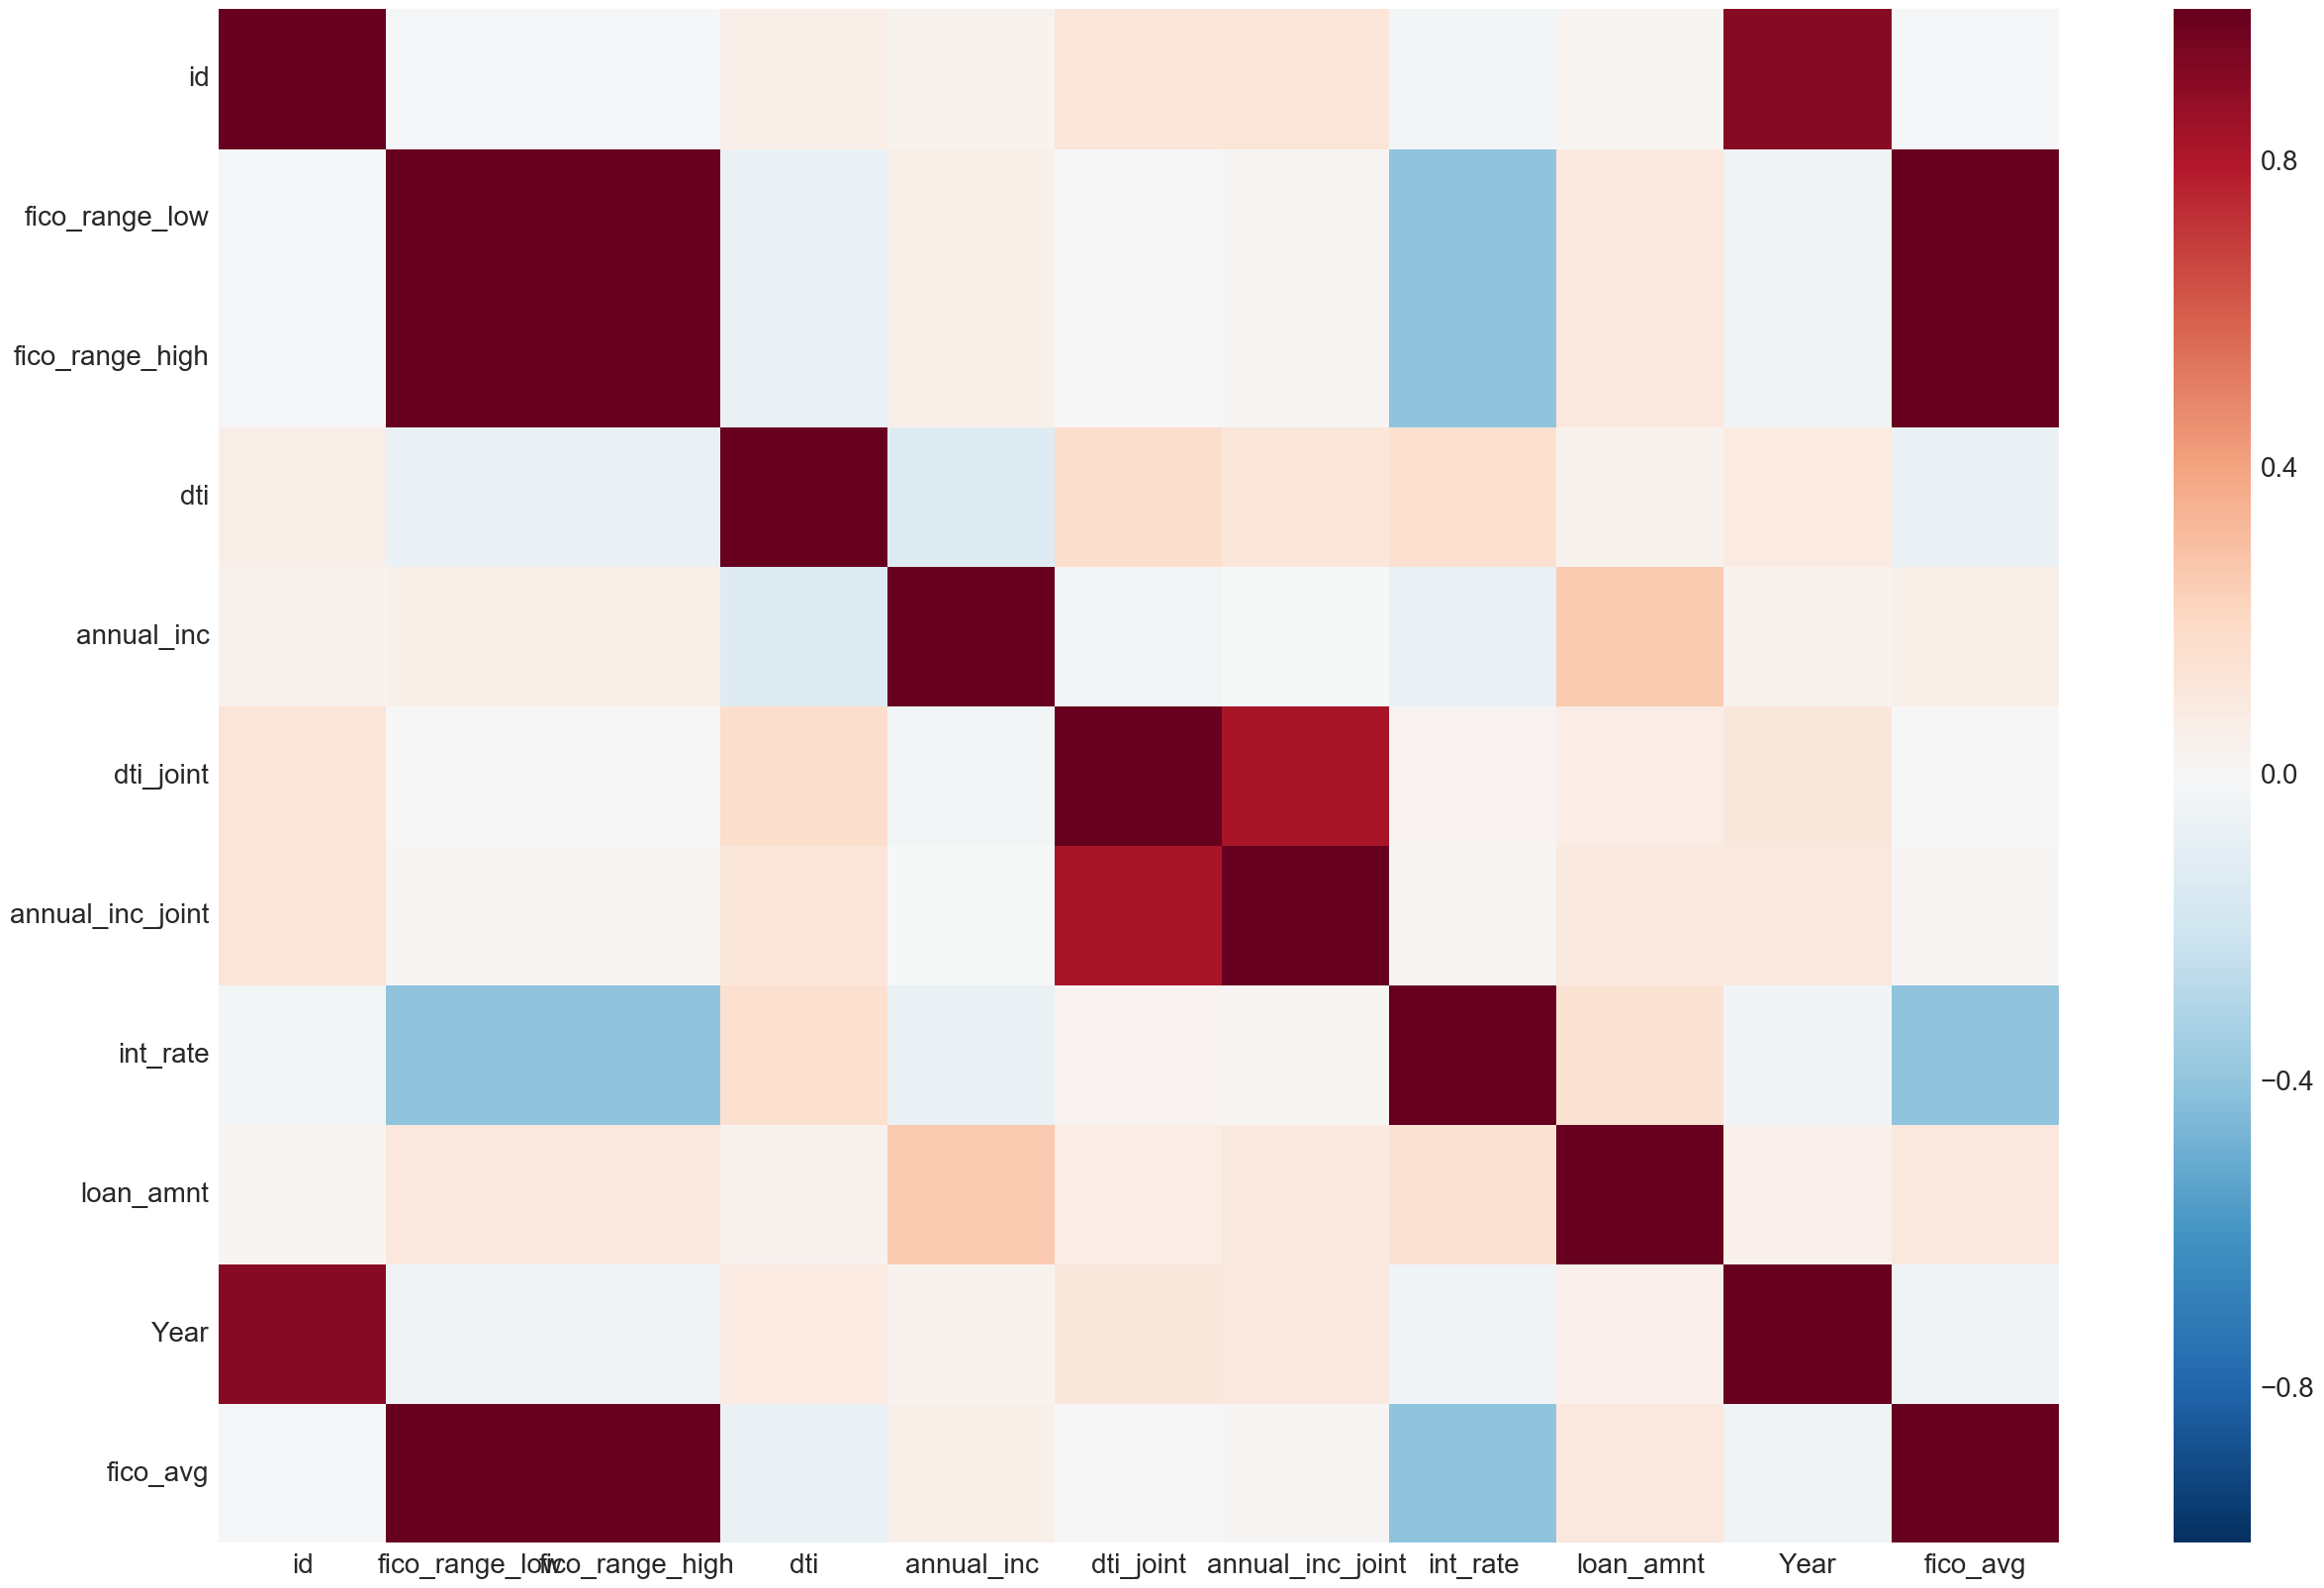

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

##### Knn for dti filling

In [44]:
base = 'id','dti','int_rate','dti_joint','annual_inc_joint','Year'
target_column = 'dti'

null = df[target_column].isnull()
not_null = ~null
num_miss = null.sum()
num_miss

X_train = df.loc[not_null, base].sample(frac = 1)
X=X_train[['id','int_rate','dti_joint','annual_inc_joint','Year']].values

y = X_train[target_column].astype(int)
y = y.values

Y_target =df.loc[null, base].sample(frac = 1)
Y =Y_target[['id','int_rate','dti_joint','annual_inc_joint','Year']].values

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)
accuracy = clf.score(X, y) 
print(accuracy)
prediction = clf.predict(Y)

Y_target.loc[Y_target.dti.isnull(),'dti'] = prediction
df.loc[df.id.isin(Y_target.id), ['dti']] = Y_target[['dti']]

##### dti_joint filling

In [69]:
part = df[['dti_joint', 'sub_grade','id']][df.application_type=='Joint App']
Mode = df['dti_joint'].mode()[0]
a = list(df['sub_grade'].unique())

for c in a:
    t = part[part.sub_grade == c]
    if( t.dti_joint.isnull().sum()==0):
            break
    else:
            if(t.shape == t[t.isnull().any(axis=1)].shape ):
                t['dti_joint'].fillna(Mode, inplace=True)
            else:
                c = t['dti_joint'].mode()[0]
                t['dti_joint'].fillna(c, inplace=True)
            part.loc[part.id.isin(t.id), ['dti_joint']] = t[['dti_joint']]
part['dti_joint'].fillna(part['dti_joint'].mode()[0], inplace = True)      
df.loc[df.id.isin(part.id), ['dti_joint']] = part[['dti_joint']]

### annual_inc

In [74]:
part = df[['id','sub_grade', 'annual_inc']]
Mode = df['annual_inc'].mode()[0]
a = list(df['sub_grade'].unique())

for c in a:
    t = part[part.sub_grade == c]
    if( t.annual_inc.isnull().sum()==0):
            break
    else:
            if(t.shape == t[t.isnull().any(axis=1)].shape ):
                t['annual_inc'].fillna(Mode, inplace=True)
            else:
                c = t['annual_inc'].mode()[0]
                t['annual_inc'].fillna(c, inplace=True)
            part.loc[part.id.isin(t.id), ['annual_inc']] = t[['annual_inc']]
part['annual_inc'].fillna(part['annual_inc'].mode()[0], inplace = True)      
df.loc[df.id.isin(part.id), ['annual_inc']] = part[['annual_inc']]

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Fico columns

In [39]:
 df['fico_avg'] = (df['fico_range_high']+df['fico_range_low'])/2

In [75]:
df.isnull().sum()

id                    0
application_type      0
fico_range_low        0
fico_range_high       0
emp_length            0
dti                 173
annual_inc            0
dti_joint             0
annual_inc_joint      0
grade                 0
sub_grade             0
int_rate              0
loan_amnt             0
issue_d               0
purpose               0
addr_state            0
zip_code              0
Year                  0
Month                 0
dtype: int64